# Import Statements


In [1]:
from tensorflow.keras.layers import Input,Dense,Flatten, Dropout
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import cv2
import shutil
import random

2022-11-06 15:59:03.753415: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


# Directory Creation

In [2]:
# creating directory 
os.mkdir('./body')
os.mkdir('./body/training')
os.mkdir('./body/training/imgaug-front')
os.mkdir('./body/training/imgaug-rear')
os.mkdir('./body/training/imgaug-side')

os.mkdir('./body/Main')
os.mkdir('./body/Main/real-front')
os.mkdir('./body/Main/real-rear')
os.mkdir('./body/Main/real-side')

os.mkdir('./body/validation')
os.mkdir('./body/validation/imgaug-front')
os.mkdir('./body/validation/imgaug-rear')
os.mkdir('./body/validation/imgaug-side')

os.mkdir('./body/Augment')
os.mkdir('./body/Augment/imgaug-front')
os.mkdir('./body/Augment/imgaug-rear')
os.mkdir('./body/Augment/imgaug-side')

# Merging Dataset

In [3]:
path_front = "../input/car-damage/Car damage/body/training/00-front"
dir_list_f = os.listdir(path_front)
path_rear = '../input/car-damage/Car damage/body/training/01-rear' 
dir_list_r = os.listdir(path_rear)
path_side = '../input/car-damage/Car damage/body/training/02-side' 
dir_list_s = os.listdir(path_side)

for j in dir_list_f:
    IMAGE_PATH = path_front+'/'+j
    
    image = cv2.imread(IMAGE_PATH)
    path = './body/Main/real-front'
    cv2.imwrite(os.path.join(path,j), image)
    
for j in dir_list_r:
    IMAGE_PATH = path_rear+'/'+j
    
    image = cv2.imread(IMAGE_PATH)
    path = './body/Main/real-rear'
    cv2.imwrite(os.path.join(path,j), image)
    
for j in dir_list_s:
    IMAGE_PATH = path_side+'/'+j
    
    image = cv2.imread(IMAGE_PATH)
    path = './body/Main/real-side'
    cv2.imwrite(os.path.join(path,j), image)

In [4]:
path_frontv = "../input/car-damage/Car damage/body/validation/00-front"
dir_list_fv = os.listdir(path_frontv)
path_rearv = '../input/car-damage/Car damage/body/validation/01-rear' 
dir_list_rv = os.listdir(path_rearv)
path_sidev = '../input/car-damage/Car damage/body/validation/02-side' 
dir_list_sv = os.listdir(path_sidev)

for j in dir_list_fv:
    IMAGE_PATH = path_frontv+'/'+j
    
    image = cv2.imread(IMAGE_PATH)
    path = './body/Main/real-front'
    cv2.imwrite(os.path.join(path,j), image)
    
for j in dir_list_rv:
    IMAGE_PATH = path_rearv+'/'+j
    
    image = cv2.imread(IMAGE_PATH)
    path = './body/Main/real-rear'
    cv2.imwrite(os.path.join(path,j), image)
    
for j in dir_list_sv:
    IMAGE_PATH = path_sidev+'/'+j
    
    image = cv2.imread(IMAGE_PATH)
    path = './body/Main/real-side'
    cv2.imwrite(os.path.join(path,j), image)

# **Image Augmentation**

In [5]:
#Augmenting and saving train body front view images

OUTPUT_DIRECTORY = './body/Augment/imgaug-front'

# Get the list of all files and directories
path_front = "./body/Main/real-front"
dir_list = os.listdir(path_front)
for j in dir_list:
    IMAGE_PATH = path_front+'/'+j
    
    image = cv2.imread(IMAGE_PATH)
    path = './body/Augment/imgaug-front'
    cv2.imwrite(os.path.join(path,j), image)
    
    image = load_img(IMAGE_PATH)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0) 

    datagen_shift = ImageDataGenerator(height_shift_range=0.2, width_shift_range=0.2)
    PREFIX = 'Shifted'
    imGen = datagen_shift.flow(image, batch_size=1, save_to_dir = OUTPUT_DIRECTORY, 
                        save_prefix=PREFIX, save_format='jpg')
    for i in range(6):
        batch = imGen.next()

    datagen_rot = ImageDataGenerator(rotation_range=30)
    PREFIX = 'Rotated'
    imGen = datagen_rot.flow(image, batch_size=1, save_to_dir = OUTPUT_DIRECTORY, 
                        save_prefix=PREFIX, save_format='jpg')
    for i in range(6):
        batch = imGen.next()

    datagen_hf = ImageDataGenerator(horizontal_flip=True)
    PREFIX = 'Hortizonal_flip'
    imGen = datagen_hf.flow(image, batch_size=1, save_to_dir = OUTPUT_DIRECTORY, 
                        save_prefix=PREFIX, save_format='jpg')
    for i in range(1):
        batch = imGen.next()


In [6]:
#Augmenting and saving train body rear view images

OUTPUT_DIRECTORY = './body/Augment/imgaug-rear'

# Get the list of all files and directories
path_front = "./body/Main/real-rear"
dir_list = os.listdir(path_front)
for j in dir_list:
    IMAGE_PATH = path_front+'/'+j
    
    image = cv2.imread(IMAGE_PATH)
    path = './body/Augment/imgaug-rear'
    cv2.imwrite(os.path.join(path,j), image)
    
    image = load_img(IMAGE_PATH)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0) 

    datagen_shift = ImageDataGenerator(height_shift_range=0.2, width_shift_range=0.2)
    PREFIX = 'Shifted'
    imGen = datagen_shift.flow(image, batch_size=1, save_to_dir = OUTPUT_DIRECTORY, 
                        save_prefix=PREFIX, save_format='jpg')
    for i in range(6):
        batch = imGen.next()

    datagen_rot = ImageDataGenerator(rotation_range=30)
    PREFIX = 'Rotated'
    imGen = datagen_rot.flow(image, batch_size=1, save_to_dir = OUTPUT_DIRECTORY, 
                        save_prefix=PREFIX, save_format='jpg')
    for i in range(6):
        batch = imGen.next()

    datagen_hf = ImageDataGenerator(horizontal_flip=True)
    PREFIX = 'Hortizonal_flip'
    imGen = datagen_hf.flow(image, batch_size=1, save_to_dir = OUTPUT_DIRECTORY, 
                        save_prefix=PREFIX, save_format='jpg')
    for i in range(1):
        batch = imGen.next()


In [7]:
#Augmenting and saving train body side view images

OUTPUT_DIRECTORY = './body/Augment/imgaug-side'

# Get the list of all files and directories
path_front = "./body/Main/real-side"
dir_list = os.listdir(path_front)
for j in dir_list:
    IMAGE_PATH = path_front+'/'+j
    
    image = cv2.imread(IMAGE_PATH)
    path = './body/Augment/imgaug-side'
    cv2.imwrite(os.path.join(path,j), image)
    
    image = load_img(IMAGE_PATH)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0) 

    datagen_shift = ImageDataGenerator(height_shift_range=0.2, width_shift_range=0.2)
    PREFIX = 'Shifted'
    imGen = datagen_shift.flow(image, batch_size=1, save_to_dir = OUTPUT_DIRECTORY, 
                        save_prefix=PREFIX, save_format='jpg')
    for i in range(6):
        batch = imGen.next()

    datagen_rot = ImageDataGenerator(rotation_range=30)
    PREFIX = 'Rotated'
    imGen = datagen_rot.flow(image, batch_size=1, save_to_dir = OUTPUT_DIRECTORY, 
                        save_prefix=PREFIX, save_format='jpg')
    for i in range(6):
        batch = imGen.next()

    datagen_hf = ImageDataGenerator(horizontal_flip=True)
    PREFIX = 'Hortizonal_flip'
    imGen = datagen_hf.flow(image, batch_size=1, save_to_dir = OUTPUT_DIRECTORY, 
                        save_prefix=PREFIX, save_format='jpg')
    for i in range(1):
        batch = imGen.next()


# Split Dataset

In [8]:
# Split the front view data in 80:20 ratio
no_of_frontal = os.listdir('./body/Augment/imgaug-front')
len(no_of_frontal)
augment_data =  './body/Augment/imgaug-front'
for f in no_of_frontal:
    if random.random() > 0.80:
        shutil.move(f'{augment_data}/{f}','./body/validation/imgaug-front' )
    else:
        shutil.move(f'{augment_data}/{f}','./body/training/imgaug-front')

In [9]:
# Split the rear view data in 80:20 ratio
no_of_rear = os.listdir('./body/Augment/imgaug-rear')

augment_data =  './body/Augment/imgaug-rear'
for f in no_of_rear:
    if random.random() > 0.80:
        shutil.move(f'{augment_data}/{f}','./body/validation/imgaug-rear' )
    else:
        shutil.move(f'{augment_data}/{f}','./body/training/imgaug-rear')

In [10]:
# Split the side view data in 80:20 ratio
no_of_side = os.listdir('./body/Augment/imgaug-side')

augment_data =  './body/Augment/imgaug-side'
for f in no_of_side:
    if random.random() > 0.80:
        shutil.move(f'{augment_data}/{f}','./body/validation/imgaug-side' )
    else:
        shutil.move(f'{augment_data}/{f}','./body/training/imgaug-side')

# Flow from Directory - Augmentation

In [11]:
img_size = [224,224] #List which stores the resolution
main_train = './body/training' #Stores the path of the train directory
main_test = './body/validation' #Stores the path of the test directory

In [12]:
#ImageDataGenerator is used to modify the train and test images w.r.t the properties mentioned
train_datagen = ImageDataGenerator(rescale = 1/255.0)

test_datagen = ImageDataGenerator(rescale = 1/255.0)

# flow_from_directory() is used to convert all the images in the specific directory
training_set = train_datagen.flow_from_directory(directory = main_train,
                                                 target_size = (224,224),
                                                 batch_size = 100,
                                                 )

test_set = test_datagen.flow_from_directory(directory = main_test,
                                                 target_size = (224,224),
                                                 batch_size = 100,
                                                 )

Found 10216 images belonging to 3 classes.
Found 2551 images belonging to 3 classes.


In [13]:
# Class_indices will display the respective class value
training_set.class_indices

{'imgaug-front': 0, 'imgaug-rear': 1, 'imgaug-side': 2}

# Model Buiding

In [14]:
vgg_model = VGG16(include_top=False,
    weights="imagenet",
    input_shape=img_size + [3])

# Loading the VGG16 pre trained model

# include_top - this specifies whether the final layer before the output layer has to be include 
# or not. If included then there will be 1000 number of classes at the output.

# Weights are trained using imagenet

2022-11-06 16:01:40.954095: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-06 16:01:40.957575: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-11-06 16:01:41.020447: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-06 16:01:41.021196: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2022-11-06 16:01:41.021253: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-11-06 16:01:41.051644: I tensorflow/stream_executor/platform/def

58892288/58889256 [==============================] - 0s 0us/step


In [15]:
# To print the hidden layer summary of vgg model without top layer
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [16]:
# To fix the weights of the pre trained model
for lay in vgg_model.layers:
    lay.trainable = False

In [17]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [18]:
# to list out number of folders in train and test folder
import os
folders_train1 = os.listdir(main_train)
print(len(folders_train1))

folders_test1 = os.listdir(main_test)
print(len(folders_test1))

3
3


In [19]:
#outputs the last layer
vgg_model.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [20]:
#inputs of the layer
vgg_model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [21]:
# Flatten() is used to convert the last layer to vector or as fully connected
x = Flatten(name="first_flatten")(vgg_model.output)
# Dense() layer is added such that it outputs only two classess 
# Softmax activation layer produces probabilities for different classess.
x = Dropout(0.5)(x)
pred = Dense(3,activation='softmax')(x)
# Model() is used to group layers
model = Model(inputs=vgg_model.input,outputs=pred)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

# **Model Fit**

In [22]:
# Loss function is used to find the errors or deviations in learning process
# Optimizer is used to optimize the input weights
# Metrics is used to measure the performance
model.compile(optimizer="adam",
    loss="categorical_crossentropy",
    metrics=['accuracy'])

In [23]:
#fit() is used to train the model
mod = model.fit( training_set, 
                validation_data=test_set, 
                epochs=8, 
                steps_per_epoch=len(training_set), 
                validation_steps=len(test_set) 
               )

2022-11-06 16:01:44.654934: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-11-06 16:01:44.658837: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000175000 Hz


Epoch 1/8


2022-11-06 16:01:45.310728: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-11-06 16:01:46.240330: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2022-11-06 16:01:46.276478: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


103/103 [==============================] - 59s 429ms/step - loss: 1.1261 - accuracy: 0.5473 - val_loss: 0.5016 - val_accuracy: 0.8044
Epoch 2/8
103/103 [==============================] - 38s 372ms/step - loss: 0.4785 - accuracy: 0.8156 - val_loss: 0.4922 - val_accuracy: 0.8067
Epoch 3/8
103/103 [==============================] - 39s 372ms/step - loss: 0.3765 - accuracy: 0.8539 - val_loss: 0.3778 - val_accuracy: 0.8518
Epoch 4/8
103/103 [==============================] - 39s 375ms/step - loss: 0.3013 - accuracy: 0.8922 - val_loss: 0.3098 - val_accuracy: 0.8883
Epoch 5/8
103/103 [==============================] - 39s 373ms/step - loss: 0.2647 - accuracy: 0.8991 - val_loss: 0.2942 - val_accuracy: 0.8871
Epoch 6/8
103/103 [==============================] - 39s 375ms/step - loss: 0.2228 - accuracy: 0.9230 - val_loss: 0.2986 - val_accuracy: 0.8879
Epoch 7/8
103/103 [==============================] - 39s 375ms/step - loss: 0.2106 - accuracy: 0.9263 - val_loss: 0.2655 - val_accuracy: 0.9079
Ep

# Saving the Model

In [24]:
# To save the particular model in .h5 format
import tensorflow as tf
from tensorflow.keras.models import load_model
model.save('vggmodelfinalbody.h5') 

# Visualization

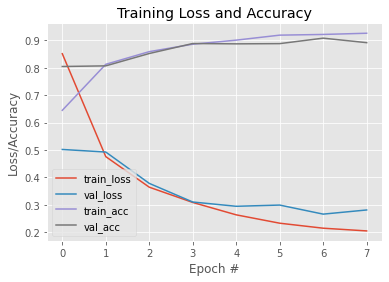

In [25]:
from matplotlib import pyplot as plt
N = 8
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), mod.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), mod.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), mod.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), mod.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('grp.png')

# Model Testing

[[1.4043907e-03 9.9854642e-01 4.9172886e-05]]
rear


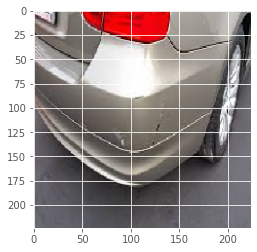

In [26]:
from tensorflow.keras.preprocessing import image
img12 =image.load_img('../input/car-damage/Car damage/body/training/01-rear/0003.JPEG',target_size=(224,224))
plt.imshow(img12)
img12 = image.img_to_array(img12)
img12 = img12/255.0
img12 = np.expand_dims(img12,axis=0)
pred1 = model.predict(img12)
print(pred1)
pred1 = np.argmax(pred1,axis=1)



if pred1[0] == 1:
    print("rear")
elif pred1[0] == 0:
    print("front")
else:
    print("side")

[[9.9921799e-01 7.5377105e-04 2.8236993e-05]]
front


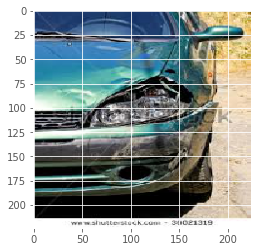

In [27]:
img12 =image.load_img('../input/car-damage/Car damage/body/training/00-front/0006.JPEG',target_size=(224,224))
plt.imshow(img12)
img12 = image.img_to_array(img12)
img12 = img12/255.0
img12 = np.expand_dims(img12,axis=0)
pred1 = model.predict(img12)
print(pred1)
pred1 = np.argmax(pred1,axis=1)



if pred1[0] == 1:
    print("rear")
elif pred1[0] == 0:
    print("front")
else:
    print("side")

[[5.7799753e-04 2.8586101e-03 9.9656337e-01]]
side


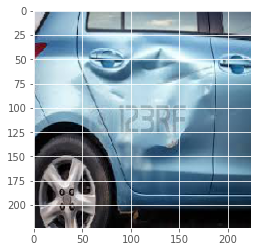

In [28]:
img12 =image.load_img('../input/car-damage/Car damage/body/training/02-side/0006.JPEG',target_size=(224,224))
plt.imshow(img12)
img12 = image.img_to_array(img12)
img12 = img12/255.0
img12 = np.expand_dims(img12,axis=0)
pred1 = model.predict(img12)
print(pred1)
pred1 = np.argmax(pred1,axis=1)



if pred1[0] == 1:
    print("rear")
elif pred1[0] == 0:
    print("front")
else:
    print("side")